<a href="https://colab.research.google.com/github/Boonyaratt/Second-Hand-Price-Prediction-CNN/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Second-Hand-Price-Prediction-CNN

##Get file from source [here!](https://zenodo.org/records/8386668)

this file download on runtime, you must run the block below to get the dataset, Which from now took about 40++ mins!


In [35]:
!wget https://zenodo.org/records/8386668/files/circular_fashion_v1.tar.gz?download=1

--2025-08-04 07:54:40--  https://zenodo.org/records/8386668/files/circular_fashion_v1.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2268791213 (2.1G) [application/octet-stream]
Saving to: ‘circular_fashion_v1.tar.gz?download=1’

     circular_fashi  30%[=====>              ] 668.24M  37.5MB/s    eta 56s    ^C


In [34]:
import os
# Rename to remove '?download=1.1'
os.rename('/content/circular_fashion_v1.tar.gz?download=1', '/content/circular_fashion_v1.tar.gz')

!tar -xvzf /content/circular_fashion_v1.tar.gz -C /content/

FileNotFoundError: [Errno 2] No such file or directory: '/content/circular_fashion_v1.tar.gz?download=1' -> '/content/circular_fashion_v1.tar.gz'

In [ ]:
!ls /content/

circular_fashion_v1.tar.gz  dec2022  jan2023  nov2022  README.md    sep2022
dataset			    feb2023  LICENSE  oct2022  sample_data


In [30]:
!ls /content/oct2022/

2022-10-03  2022-10-11	2022-10-17  2022-10-21	2022-10-27
2022-10-05  2022-10-12	2022-10-18  2022-10-24	2022-10-28
2022-10-06  2022-10-13	2022-10-19  2022-10-25	2022-10-31
2022-10-10  2022-10-14	2022-10-20  2022-10-26


In [ ]:
!ls /content/dec2022/2022-12-01

back_2022_12_01_09_56_35.jpg   front_2022_12_01_10_15_13.jpg
back_2022_12_01_09_56_38.jpg   front_2022_12_01_10_19_35.jpg
back_2022_12_01_10_01_59.jpg   front_2022_12_01_12_49_46.jpg
back_2022_12_01_10_04_50.jpg   front_2022_12_01_12_52_40.jpg
back_2022_12_01_10_07_56.jpg   front_2022_12_01_12_54_58.jpg
back_2022_12_01_10_10_58.jpg   front_2022_12_01_12_57_20.jpg
back_2022_12_01_10_15_13.jpg   front_2022_12_01_13_01_33.jpg
back_2022_12_01_10_19_35.jpg   front_2022_12_01_13_04_18.jpg
back_2022_12_01_12_49_46.jpg   front_2022_12_01_13_07_23.jpg
back_2022_12_01_12_52_40.jpg   front_2022_12_01_13_09_52.jpg
back_2022_12_01_12_54_58.jpg   front_2022_12_01_13_11_53.jpg
back_2022_12_01_12_57_20.jpg   front_2022_12_01_13_13_28.jpg
back_2022_12_01_13_01_33.jpg   front_2022_12_01_13_16_21.jpg
back_2022_12_01_13_04_18.jpg   front_2022_12_01_13_18_24.jpg
back_2022_12_01_13_07_23.jpg   front_2022_12_01_13_20_26.jpg
back_2022_12_01_13_09_52.jpg   front_2022_12_01_13_25_14.jpg
back_2022_12_01_13_11_53

#Create Dataset


Make function to combine image and labeling data from dir

In [36]:
import os
import json
import pandas as pd

import os
import json
import pandas as pd

def build_dataset_from_month(month_dir):
    all_data = []

    for day in os.listdir(month_dir):
        day_path = os.path.join(month_dir, day)
        if not os.path.isdir(day_path):
            continue

        for filename in os.listdir(day_path):
            if filename.startswith("labels_") and filename.endswith(".json"):
                label_path = os.path.join(day_path, filename)

                try:
                    with open(label_path, 'r') as f:
                        label_data = json.load(f)
                except json.JSONDecodeError as e:
                    print(f"[ERROR] Failed to parse JSON in: {label_path}")
                    print(f"        Error: {e}")
                    continue
                except Exception as e:
                    print(f"[ERROR] Other error in: {label_path}")
                    print(f"        Error: {e}")
                    continue

                timestamp = filename.replace("labels_", "").replace(".json", "")

                front_img = os.path.join(day_path, f"front_{timestamp}.jpg")
                back_img = os.path.join(day_path, f"back_{timestamp}.jpg")
                brand_img = os.path.join(day_path, f"brand_{timestamp}.jpg")
                brand_img = brand_img if os.path.exists(brand_img) else None

                label_data['front_img'] = front_img
                label_data['back_img'] = back_img
                label_data['brand_img'] = brand_img
                label_data['timestamp'] = timestamp
                label_data['day'] = day

                all_data.append(label_data)

    return pd.DataFrame(all_data)


##remove error file


In [37]:
!cat /content/oct2022/2022-10-17/labels_2022_10_17_07_40_32.json

cat: /content/oct2022/2022-10-17/labels_2022_10_17_07_40_32.json: No such file or directory


In [41]:
os.remove("content/oct2022/2022-10-17/labels_2022_10_17_07_40_32.json")
os.remove("content/oct2022/2022-10-17/back_2022_10_17_07_40_32.png")
os.remove("content/oct2022/2022-10-17/front_2022_10_17_07_40_32.png")
os.remove("content/oct2022/2022-10-17/brand_2022_10_17_07_40_32.png")

FileNotFoundError: [Errno 2] No such file or directory: 'content/oct2022/2022-10-17/labels_2022_10_17_07_40_32.json'

## Create Dataframe

In [43]:
df_dec2022 = build_dataset_from_month('/content/dec2022')
df_feb2023 = build_dataset_from_month('/content/feb2023')
df_jan2023 = build_dataset_from_month('/content/jan2023')
df_nov2022 = build_dataset_from_month('/content/nov2022')
df_oct2022 = build_dataset_from_month('/content/oct2022')

df = pd.concat([df_dec2022, df_feb2023, df_jan2023, df_nov2022,df_oct2022])

##Data Explore

In [44]:
df.tail()

,brand,brandtext,category,type,size,colors,season,pilling,condition,price,...,damage,material,comment,usage,front_img,back_img,brand_img,timestamp,day,weight
844,H&M,NaN,Ladies,Shirt,40,"[Black, Beige]",All,5,2,<50,...,sweat stains,100% polyester,test 77,Recycle,/content/oct2022/2022-10-28/front_2022_10_28_1...,/content/oct2022/2022-10-28/back_2022_10_28_11...,/content/oct2022/2022-10-28/brand_2022_10_28_1...,2022_10_28_11_50_22,2022-10-28,0.0
845,Free quent,NaN,Ladies,Dress,None,[Black],All,4,3,<50,...,loose threads,100% acrylic,test 83,Repair,/content/oct2022/2022-10-28/front_2022_10_28_1...,/content/oct2022/2022-10-28/back_2022_10_28_13...,None,2022_10_28_13_12_05,2022-10-28,0.0
846,Not Applicable,NaN,Ladies,Top,M,[Green],All,3,2,<50,...,,100% viscose,test 76,Recycle,/content/oct2022/2022-10-28/front_2022_10_28_1...,/content/oct2022/2022-10-28/back_2022_10_28_11...,None,2022_10_28_11_31_53,2022-10-28,0.0
847,Isolde,NaN,Ladies,Cardigan,XXL,[Pink],Summer,5,2,<50,...,2 loose threads,"60% cotton, 40% acrylic",test 82,Repair,/content/oct2022/2022-10-28/front_2022_10_28_1...,/content/oct2022/2022-10-28/back_2022_10_28_11...,/content/oct2022/2022-10-28/brand_2022_10_28_1...,2022_10_28_11_37_55,2022-10-28,0.0
848,COS,NaN,Ladies,Top,M,"[White, Black]",All,5,2,<50,...,sweat stains,100% cotton,test 19,Recycle,/content/oct2022/2022-10-28/front_2022_10_28_1...,/content/oct2022/2022-10-28/back_2022_10_28_11...,/content/oct2022/2022-10-28/brand_2022_10_28_1...,2022_10_28_11_43_20,2022-10-28,0.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1912 entries, 0 to 848
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   brand      1912 non-null   object 
 1   brandtext  741 non-null    object 
 2   category   1912 non-null   object 
 3   type       1912 non-null   object 
 4   size       1912 non-null   object 
 5   colors     1912 non-null   object 
 6   season     1912 non-null   object 
 7   pilling    1912 non-null   int64  
 8   condition  1912 non-null   int64  
 9   price      1912 non-null   object 
 10  annotator  1912 non-null   object 
 11  cut        1912 non-null   object 
 12  pattern    1912 non-null   object 
 13  trend      1912 non-null   object 
 14  smell      741 non-null    object 
 15  stains     1912 non-null   object 
 16  holes      741 non-null    object 
 17  damage     1912 non-null   object 
 18  material   1912 non-null   object 
 19  comment    1912 non-null   object 
 20  usage      191

In [23]:
df.describe()

,pilling,condition,weight
count,1063.000000,1063.000000,322.0
mean,4.227658,3.394167,0.0
std,0.873823,1.137382,0.0
min,1.000000,1.000000,0.0
25%,4.000000,3.000000,0.0
50%,4.000000,3.000000,0.0
75%,5.000000,4.000000,0.0
max,5.000000,5.000000,0.0


###Display Some Cloths Image


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import json

def display_sample(row):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    for i, img_type in enumerate(['front_img', 'back_img', 'brand_img']):
        img_path = row[img_type]
        if img_path and os.path.exists(img_path):
            img = Image.open(img_path)
            axs[i].imshow(img)
            axs[i].set_title(img_type)
            axs[i].axis('off')
        else:
            axs[i].set_title(f"{img_type}\nNot Found")
            axs[i].axis('off')

    plt.suptitle(f"Date: {row['day']} | Timestamp: {row['timestamp']}")
    plt.show()

    print("Category:")
    print(json.dumps(row['category'], indent=2))
    print("Type:")
    print(json.dumps(row['type'], indent=2))
    print("size:")
    print(json.dumps(row['size'], indent=2))
    print("Colors:")
    print(json.dumps(row['colors'], indent=2))
    print("price:")
    print(json.dumps(row['price'], indent=2))


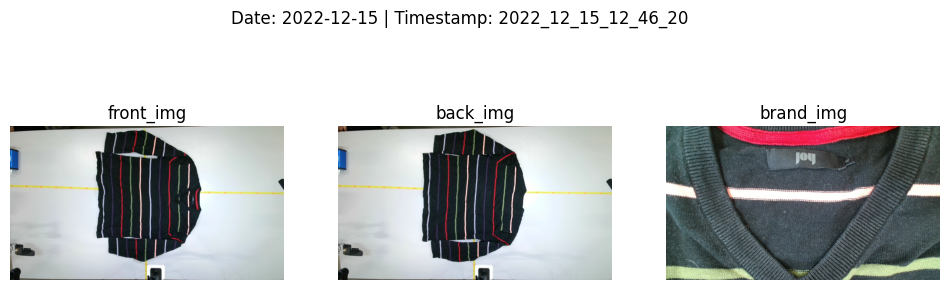

Category:
"Men"
Type:
"Sweater"
size:
"XL"
Colors:
[
  "Multicolor",
  "Black",
  "Purple",
  "Grey",
  "Green",
  "Red",
  "Pink"
]
price:
"<50"


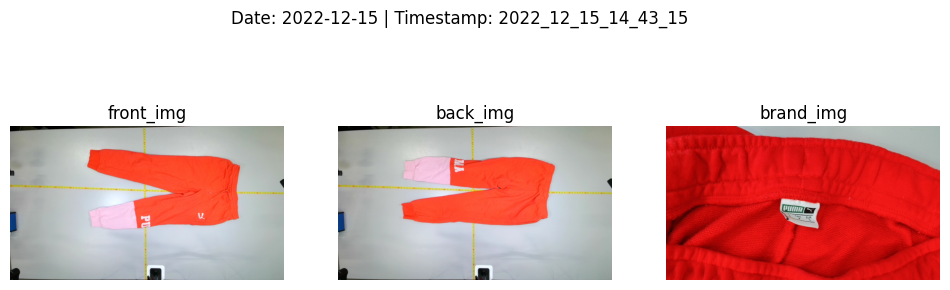

Category:
"Ladies"
Type:
"Trousers"
size:
"S "
Colors:
[
  "Red",
  "Pink"
]
price:
"50-100"


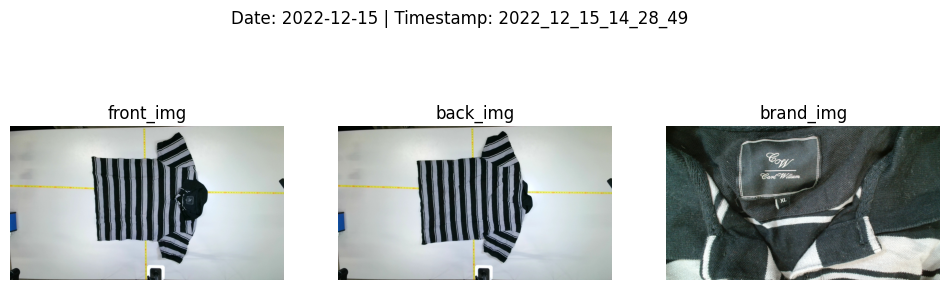

Category:
"Men"
Type:
"T-shirt"
size:
"XL"
Colors:
[
  "Black",
  "Grey"
]
price:
"<50"


In [ ]:
for i in range(3):
  display_sample(df.iloc[i])

In [ ]:
df.isna().sum()

,0
brand,0
brandtext,322
category,0
type,0
size,0
colors,0
season,0
pilling,0
condition,0
price,0


In [ ]:
!git remote add origin https://github.com/Boonyaratt/Second-Hand-Price-Prediction-CNN/tree/main

fatal: not a git repository (or any of the parent directories): .git
